# Example usage

In [2]:
# all the imports
import lr_cd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

0.1.0


# Background of the package

### Coordinate Descent Algorithm in Linear Regression



The linear regression model is given by:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p + \epsilon $$

where $y$ is the response variable, $\beta_0$ is the intercept, $\beta_1, \beta_2, \ldots, \beta_p$ are the coefficients, $x_1, x_2, \ldots, x_p$ are the predictor variables, and $\epsilon$ is the error term.

The mean squared error (MSE) for linear regression is given by:

$$ \text{MSE}(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}))^2 $$

The gradient of the MSE with respect to a single coefficient $\beta_j$ is given by:

$$ \frac{\partial \text{MSE}(\beta)}{\partial \beta_j} = -\frac{2}{n} \sum_{i=1}^{n} x_{ij} (y_i - \hat{y}_i) $$
for $j=1,\dots,p$,
$$ \frac{\partial \text{MSE}(\beta)}{\partial \beta_j} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) $$
for $j=0$,
where $\hat{y}_i$ is the predicted value for the $i$-th observation.


**Paragraph describing what packages does**

# Data generation function

**describe what this function does**

In [ ]:
from lr_cd.lr_data_generation import generate_data_lr
import numpy as np

# example 1
theta = np.array([4, 3])
X, y = generate_data_lr(n=10, n_features=1, theta=theta)

## Results of `sklearn`

# algorthm function

**describe what this function does**

In [ ]:
from lr_cd.lr_cd import coordinate_descent

# example 1 use the data generation function output 1
intercept, coef, _ = coordinate_descent(X, y)
intercept
coef

In [ ]:
# example 2: from real-word dataset

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# lr_cd
intercept, coef, _ = coordinate_descent(diabetes_X_train, diabetes_y_train.reshape(-1,1))
intercept, coef


**comparing our result with sklearn package, briefly explain the goal here (same result as sklearn)**

In [10]:
# compare sklearn result for example 1
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_
lin_reg.coef_

array([4.02400155])

In [ ]:
# compare sklearn result for example 2
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# results
regr.coef_
regr.intercept_

**explain the result, and compare it to the result generated from lr_cd**

# visualization funtion

**describe what this function does**

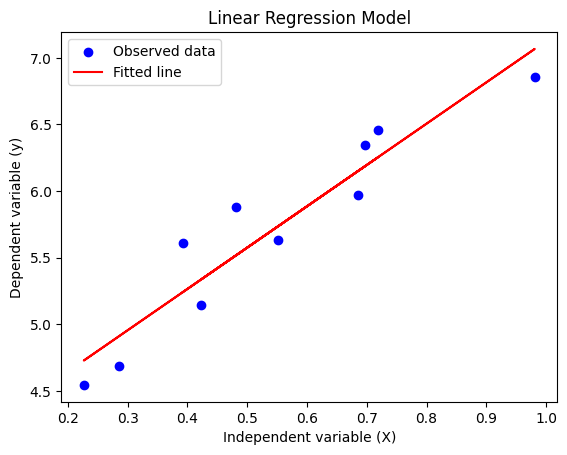

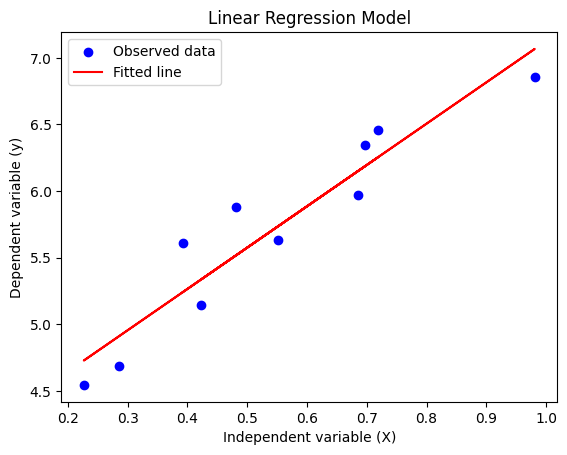

In [9]:
# example 1
from lr_cd.lr_plotting import plot_lr
plot_1 = plot_lr(X, y, intercept, coef)

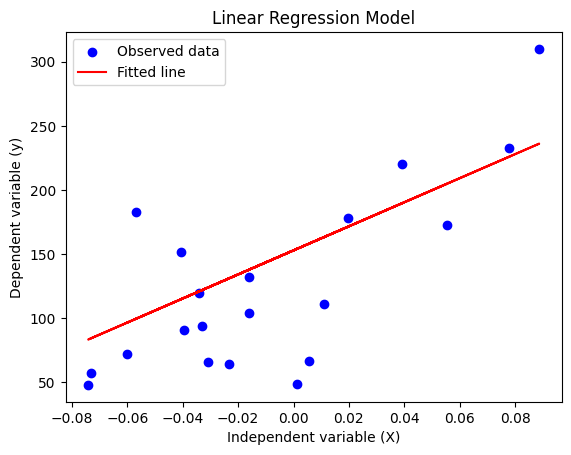

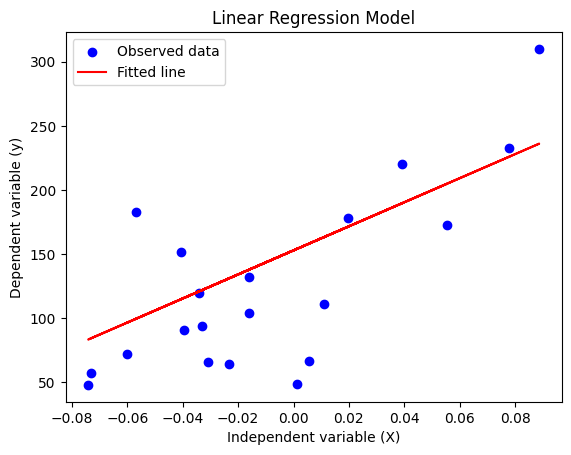

In [32]:
# example 2:

# plot outputs from our package
plot_lr(diabetes_X_test, diabetes_y_test, intercept, coef)

# Plot outputs from sklearn
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()